**The objective of this notebook is to explore the air quality of India's major cities. **

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('city_day.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
def missing_values(df):

    missing_val = df.isnull().sum()
    
    missing_val_pct = 100 * df.isnull().sum() / len(df)
    
    table = pd.concat([missing_val, missing_val_pct], axis = 1)
    
    missing_values_renamed = table.rename(columns = {0: '# of Missing Values', 1 : '% of Total Values'})
    
    missing_values_renamed = missing_values_renamed[missing_values_renamed.iloc[:,1] != 0].sort_values(by = '% of Total Values', ascending = False)
    
    return missing_values_renamed

In [6]:
missing_values(df)

,# of Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [7]:
df['AQI'].fillna(method = 'bfill',inplace = True)
df['AQI_Bucket'].fillna(method = 'bfill',inplace = True)

In [26]:
AQI_avg = df.groupby(['City']).AQI.agg(['mean','max','min']).reset_index()
AQI_avg.sort_values('mean',ascending=False)

,City,mean,max,min
0,Ahmedabad,372.322051,2049.0,48.0
10,Delhi,258.610254,716.0,29.0
19,Lucknow,232.798905,707.0,39.0
12,Gurugram,223.942228,891.0,38.0
21,Patna,221.110334,619.0,53.0
23,Talcher,172.035676,570.0,13.0
6,Brajrajnagar,158.122601,355.0,22.0
16,Jorapokhar,151.049615,604.0,27.0
13,Guwahati,139.669323,956.0,25.0
18,Kolkata,138.920147,475.0,26.0


In [9]:
AQI_Bucket_max = df.groupby(['City']).AQI_Bucket.agg(['max']).reset_index()
AQI_Bucket_max.sort_values('max',ascending=False)

,City,max
0,Ahmedabad,Very Poor
12,Gurugram,Very Poor
23,Talcher,Very Poor
21,Patna,Very Poor
20,Mumbai,Very Poor
19,Lucknow,Very Poor
18,Kolkata,Very Poor
16,Jorapokhar,Very Poor
15,Jaipur,Very Poor
14,Hyderabad,Very Poor


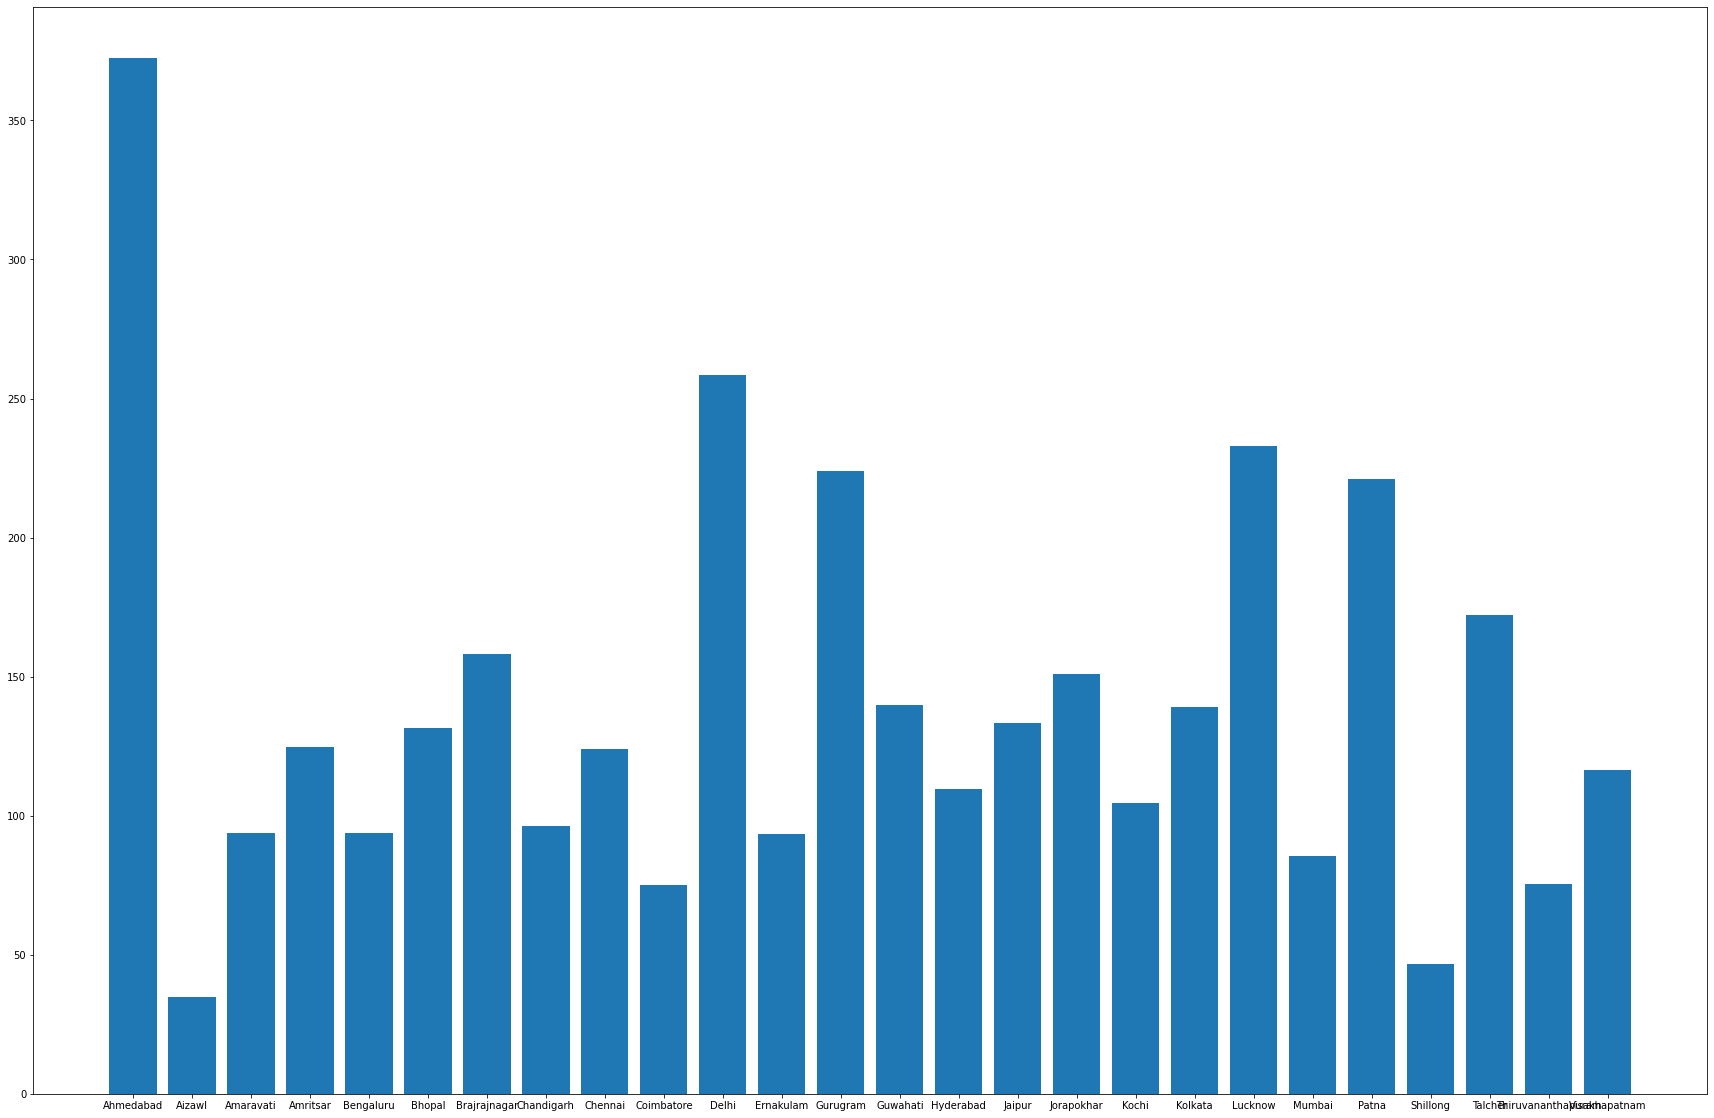

In [27]:
plt.figure(figsize=(30,20))
plt.bar(AQI_avg['City'],AQI_avg['mean'])
plt.show()